# Autoregression Models for Time Series Forecasting With Python

## Updated Autoregression Model

https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

In [1]:
from pandas import read_csv, DataFrame, concat
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
series = read_csv("daily-min-temperatures.csv", header=0, index_col=0)

Split into train and test sets

In [3]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

Train autoregression

In [4]:
window = 29
model = AutoReg(train, lags=29)

/home/vladiant/.local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [5]:
model_fit = model.fit()
coef = model_fit.params

Walk over time steps in test

In [6]:
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]

In [7]:
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print(f"predicted={yhat}, expected={obs}")

predicted=[11.87127485], expected=[12.9]
predicted=[13.65929693], expected=[14.6]
predicted=[14.34924559], expected=[14.]
predicted=[13.42745378], expected=[13.6]
predicted=[13.37487746], expected=[13.5]
predicted=[13.47999077], expected=[15.7]
predicted=[14.76514638], expected=[13.]


In [8]:
rmse = sqrt(mean_squared_error(test, predictions))

In [9]:
print(f"Test RMSE: {rmse:.3f}")

Test RMSE: 1.204


Plot predictions vs expected

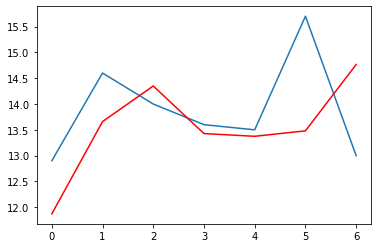

In [10]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()